# FordGo bike System Data Exploration

### By Faouzi NAJEH
### May 2021

## Investigation Overview

On this project I am interested to determine the rush hour/day of week, and the most frequent start_station in the dataset, how does the trip duration variate by each of features('start_hour', 'day of week', 'user_type', 'member_gender').

## Data Overview

##### We have 183412 bike rider in this dataset with 16 features that held various informations about each row whose can be presented as : 
1. Location : which is defined by longitude and latitude variables prensented as floats.
2. Time : defined by two datetime variables('start_time' and 'end_time') and 'duration' which is an integer that present the trip duration in seconds. 
3. ID's : refers to bike and various stations, presented as objects.
4. Bike-riders different informations ('age', 'category', 'gender', 'birth_year'), also stations names.

In [1]:
#Load all needed packages through the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#import data with pandas
df = pd.read_csv('master_clean_data')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,start_date,start_hour,start_dayofweek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,37,869.750000,2019-02-28,17,Thursday
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,49,1030.900000,2019-02-28,12,Thursday
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,32,608.166667,2019-02-28,17,Thursday
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,47,26.416667,2019-02-28,23,Thursday
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,62,29.883333,2019-02-28,23,Thursday


In [3]:
# Orders for hours of day and days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = df.start_hour.value_counts().sort_index().index
base_color = sb.color_palette()[0]

In [4]:
head_stations = df.start_station_name.value_counts(sort=True, ascending=False)[:10].index

## FordGo Bike Trip duration distribution

By plotting the distribution of 'duration_sec' on a logarithmic scale and the the distribution of duration in minutes, it seems the'duration' variable is normally distributed, unimodal distribution, also most of trips duration falling in the interval [1, 15] minutes, 75% of trips duration are lower than 13 minutes.

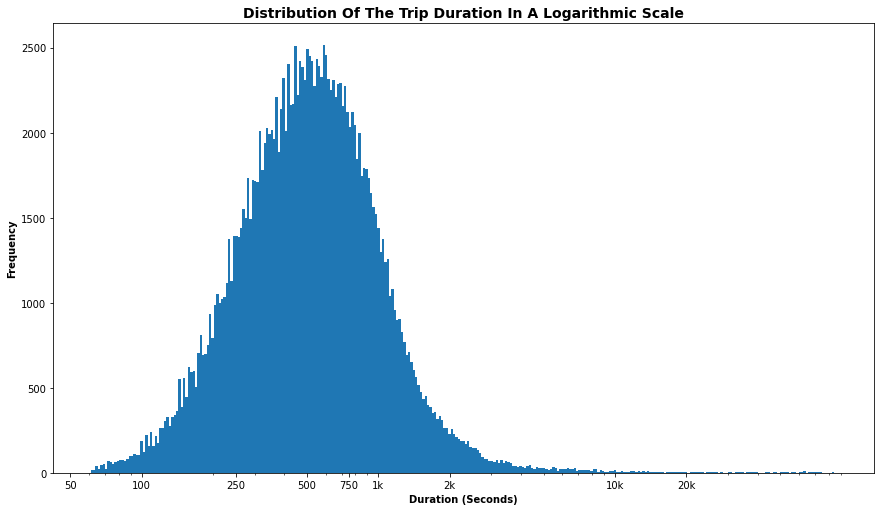

In [5]:
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max()) + 0.01 , 0.01)
plt.figure(figsize=[14.7, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 250, 500, 750, 1e3, 2e3, 1e4, 2e4], [50, 100, 250, 500, 750, '1k', '2k', '10k', '20k'])
plt.xlabel('Duration (seconds)'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Distribution of the Trip Duration in a Logarithmic scale'.title(), fontsize=14, weight='bold');

### FordGo Bike Most frequent hour & day of week 

Look at the most frequent start_hour (rush hour) and most frequent day in term of bike usage by plotting both hourly and daily frequency :

- We have two rush hours one from 8am to 9am and a second from 17am to 18 am.
- Generally, we have a low usage of bike on the weekend and a high one during other day of week, with 'Thursday' as the most frequent day, also 'Tuesday' and 'Wednesday' indicates important number of trips.

In [6]:
def myCountPlot(df, xVar, order, color, hueVar=None, palette=None):
    #this function will take a column named xVar from the df dataframe 
    # and plot data with a seaborn countplot, with the specified order
    #set up the plot
    ax = sb.countplot(data = df, x = xVar, hue = hueVar, color=color, order=order, palette=palette)
    #Plot labels
    ax.set(xlabel= xVar.replace('_', ' ').title(),
          ylabel = 'Frequency',
          title = f"Frequency of Bike usage by {xVar.replace('_', ' ')}".title());

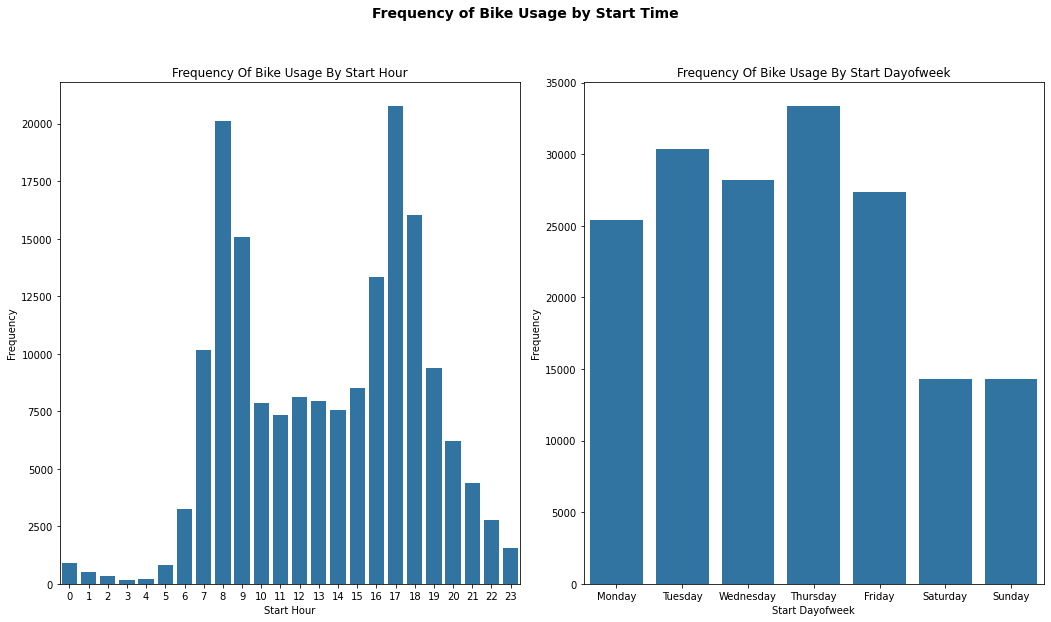

In [7]:
plt.figure(figsize=[14.7, 8.27])

plt.subplot(1, 2, 1)
myCountPlot(df, 'start_hour', hour_order, color=base_color)

plt.subplot(1, 2, 2)
myCountPlot(df, 'start_dayofweek', day_order, color=base_color)

plt.suptitle("Frequency of Bike Usage by Start Time", y = 1.04, fontsize=14, weight='bold')
plt.tight_layout();

### FordGo Bike Trip duration by the most frequent Start Station

San Fransisco and Powell St stations have the longest trip durations on the dataset. That's may help when searching to improve bike availability for these stations.

In [8]:
head_stations = df.start_station_name.value_counts(sort=True, ascending=False)[:10].index

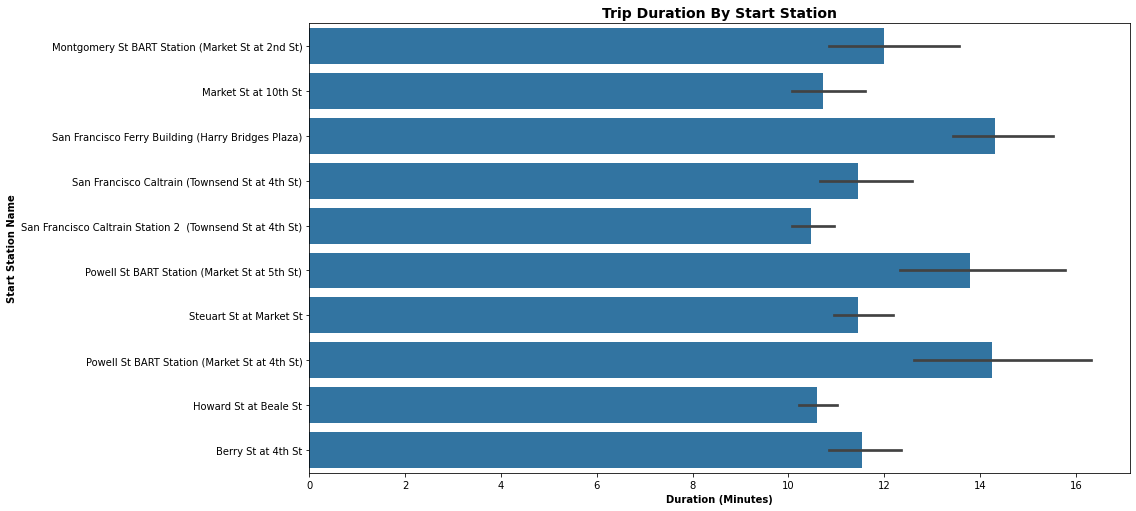

In [9]:
plt.figure(figsize=(14.7, 8.27))
df_sub = df.loc[df['start_station_name'].isin(head_stations)]
sb.barplot(data=df_sub, y='start_station_name', x = 'duration_min', color=base_color)
plt.ylabel('Start Station Name'.title(), fontsize=10, weight='bold')
plt.xlabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Trip Duration by Start Station'.title(), fontsize=14, weight='bold');

### FordGo Bike Trip duration vs. Start day of week by Gender 

The trip duration is longer during weekend as we found on the previous part, but majority of longest trips fall in the other gender followed by female and then male with the shortest durations but all arround the mean, also for Males and Females the longest trip durations indicated on weekends. On Thursday, which is the most frequent day in term of bike usage, the trip duration is almost between 10min and 13min.

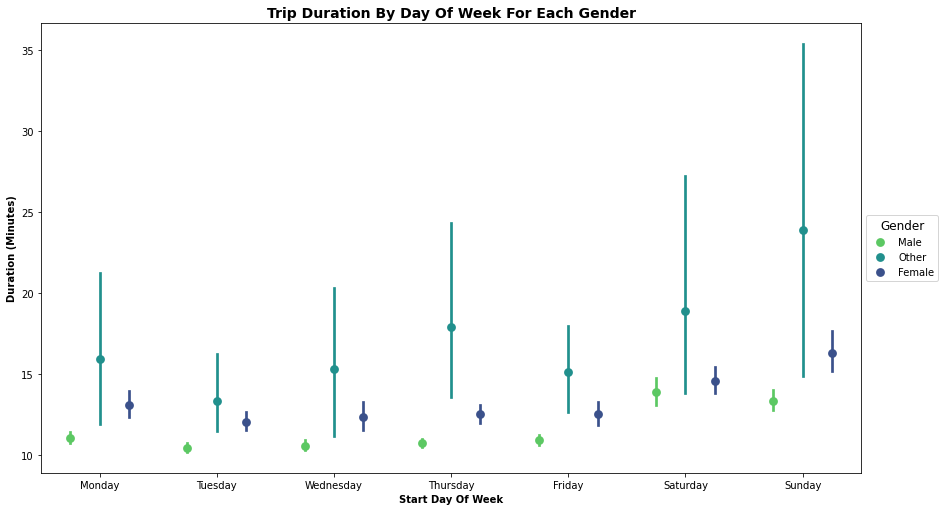

In [10]:
plt.figure(figsize=(14.7, 8.27))
ax = sb.pointplot(data=df, x='start_dayofweek', y='duration_min',
                  hue='member_gender', palette = 'viridis_r', linestyles='', dodge=0.5, order=day_order)
plt.xlabel('Start Day of Week'.title(), fontsize=10, weight='bold')
plt.ylabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Trip Duration by day of week for each gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Gender", title_fontsize = 12);
plt.show();

### FordGo Bike Trip duration vs. Start hour by Type of user

During all hours of the day in our data we have important trip duration with cusrtomer than with subscriber.

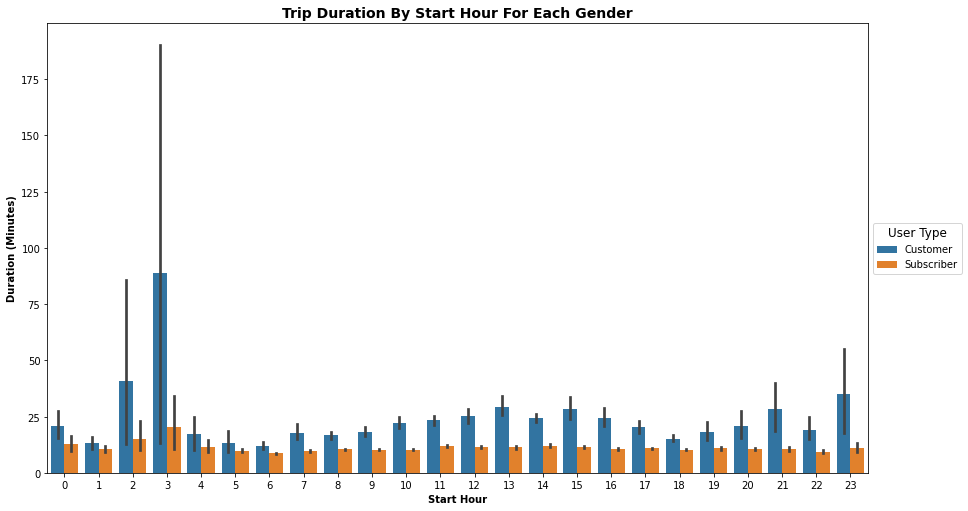

In [11]:
plt.figure(figsize=(14.7, 8.27))
sb.barplot(data=df, x ='start_hour', y= 'duration_min'
           ,hue='user_type', order=hour_order)
plt.xlabel('Start Hour'.title(), fontsize=10, weight='bold')
plt.ylabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Trip Duration by start hour for each gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

### FordGo Bike Trip duration by vs. User Type by Gender

For subscribers, which represent 90% of the data, although male are more important in number, female gender indicates more important trip durations than male. All customers trip duration are greater than 20 minutes, on the other hand in subscriber group we have a maximum duration of 14 min. It seems that most of subscribers use bike for short trajectory.

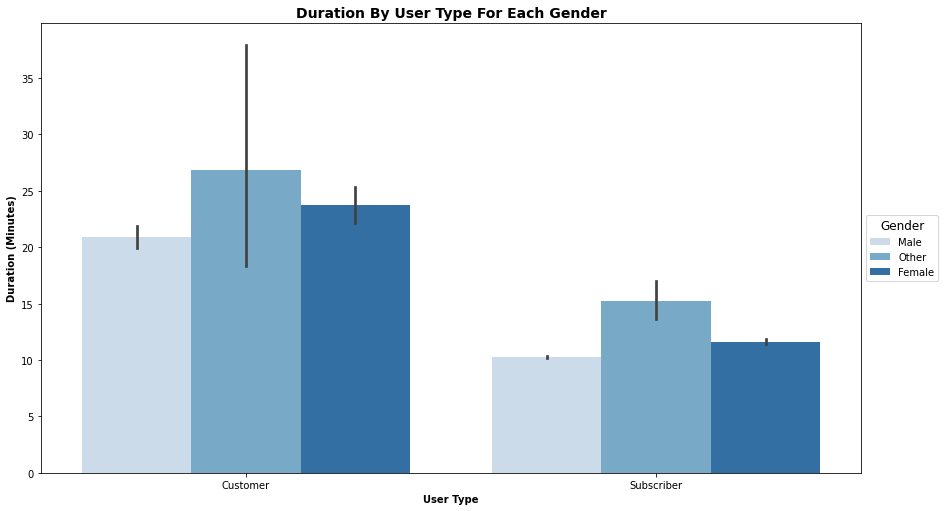

In [12]:
plt.figure(figsize=(14.7, 8.27))
sb.barplot(data=df, x ='user_type', y= 'duration_min'
           ,hue='member_gender', palette = 'Blues')
plt.xlabel('User Type'.title(), fontsize=10, weight='bold')
plt.ylabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Duration by User Type for each Gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Gender", title_fontsize = 12);

In [1]:
!jupyter nbconvert Communicate_data_findings_slideDeck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Communicate_data_findings_slideDeck.ipynb to slides
[NbConvertApp] Writing 456322 bytes to Communicate_data_findings_slideDeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\li